In [ ]:
# Test what's up with the HDF files from 1979-2014

In [13]:
# Imports
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import exists, join
import pandas as pd
from PIL import Image
import re
import subprocess
import urllib
import xarray as xr

# Silence warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [11]:
pip install lxml 

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Test to open 2015
f = "../data/test/GlobSnow_SWE_L3B_monthly_201512_v2.0.hdf"
data = xr.open_dataset(f)

In [20]:
print(data)

<xarray.Dataset>
Dimensions:      (fakeDim0: 721, fakeDim1: 721, fakeDim2: 721, fakeDim3: 721)
Dimensions without coordinates: fakeDim0, fakeDim1, fakeDim2, fakeDim3
Data variables:
    swe_average  (fakeDim0, fakeDim1) float32 ...
    swe_maximum  (fakeDim2, fakeDim3) float32 ...
Attributes:
    Data content, field 1:        Monthly mean Snow Water Equivalent (mm)
    Data content, field 2:        Monthly maximum Snow Water Equivalent (mm)
    Sensor :                      SSM/I
    Data Date :                   yyyymmdd
    Processing Date:              yyyymmdd
    Coordinate system :           Equal-Area Scalable Earth Grid (EASE-Grid) ...
    Latitude range:               35N - 85N
    Longitude range:              180W - 180E
    Spatial Resolution :          25 X 25 sq.km
    Processing software name:     FMI assimilation algorithm (Pullianen 2006)
    Processing software version:  v 2.0
    Processing Organisation:      Finnish Meteorological Institute
    Landmask :           

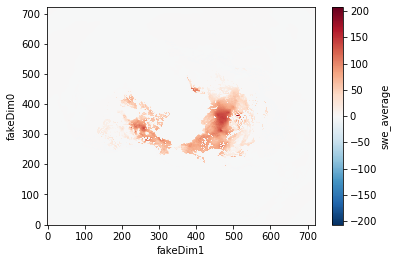

In [21]:
data.swe_average.plot()

In [26]:
# ok, so this doesn't even open 1980
f2 = "../data/test/GlobSnow_SWE_L3B_monthly_201512_v2.0.hdf"
data2 = xr.open_dataset(f2)

In [ ]:
print(f2)

In [54]:
bash_cmd = (
                f"gdalinfo f2"
            subprocess.Popen(bash_cmd, cwd=folder, shell=True, executable='/bin/bash')

SyntaxError: invalid syntax (<ipython-input-54-e0718f1cbe3a>, line 3)

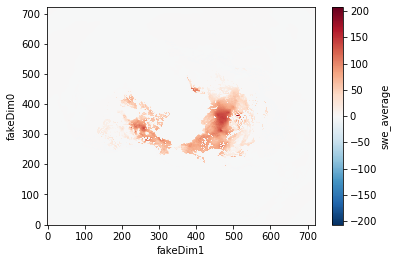

In [28]:
data2.swe_average.plot()

In [29]:
# ulx = x-axis map coordinate of the outer edge of the upper-left pixel
ulx = -9036842.76

# y-axis map coordinate of the outer edge of the upper-left pixel
uly = 9036842.76

# grid size
grid_size = 25

# number of rows and columns
num_cols = 721
num_rows = 721


In [31]:
lrx = ulx + grid_size*num_cols

lry = uly - grid_size*num_rows

print(lrx)
print(lry)

-9018817.76
9018817.76


In [63]:
pwd

'/home/jovyan/ghw2019_Snowatlas/data/test'

In [68]:
cd ~/ghw2019_Snowatlas/data/test

/home/jovyan/ghw2019_Snowatlas/data/test


In [51]:
!gdal_translate -of VRT -a_nodata -1 -a_srs EPSG:4326 -a_ullr {ulx} {uly} {lrx} {lry} HDF4_SDS:UNKNOWN:"GlobSnow_SWE_L3B_monthly_201512_v2.0.hdf":SWE_average test_201512.vrt

Input file size is 721, 721


In [62]:
!gdalwarp -of GTiff -t_srs EPSG:4326 -r cubic test_201512.vrt test_201512.tif

Creating output file that is 721P x 721L.
Processing test_201512.vrt [1/1] : 0Using internal nodata values (e.g. -1) for image test_201512.vrt.
Copying nodata values from source test_201512.vrt to destination test_201512.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [69]:
!gdalinfo test_201512.tif

Driver: GTiff/GeoTIFF
Files: test_201512.tif
Size is 721, 721
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-9036842.759999999776483,9036842.759999999776483)
Pixel Size = (25.000000000000000,-25.000000000000000)
Metadata:
  AREA_OR_POINT=Area
  Coordinate system=Equal-Area Scalable Earth Grid (EASE-Grid) - Northern Hemisphere
  Data content, field 1=Monthly mean Snow Water Equivalent (mm)
  Data content, field 2=Monthly maximum Snow Water Equivalent (mm)
  Data Date=yyyymmdd
  forest mask name=GLC-2000 derived forest mask
  forest mask version=v 2.0
  Landmask=GLC-2000 derived land classification mask
  Landmask version=v 2.0
  Latitude range=35N - 85N
  Longitude range=180W - 180E
  Mountain mask=ETOPO-5 derived mountain mask
  Mountain mask ver

In [70]:
im = Image.open(test_201512.tif)
plt.imshow(im)

NameError: name 'test_201512' is not defined